In [12]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
#load in the data
dataset = load_dataset("potsawee/wiki_bio_gpt3_hallucination")

Found cached dataset parquet (/home/gforbes/.cache/huggingface/datasets/potsawee___parquet/potsawee--wiki_bio_gpt3_hallucination-9bba6a0f21f1b815/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 1/1 [00:00<00:00, 719.06it/s]


In [13]:
#load in csv data
metrics = pd.read_csv("Eval_Scores.csv")
#metrics = pd.read_csv("Smart_scores.csv")

In [14]:
dataset["evaluation"]#["evaluation"][0]
metrics

,Unnamed: 0,fact,qags,rouge1,rouge2,rougeL,Smart1,Smart2,SmartL,zs,conv,SelfCheckGPT
0,0,0.000000,0.166667,0.028230,0.002957,0.023887,23.487301,19.520974,21.659856,-0.552719,0.249117,-0.997416
1,1,0.000000,0.086364,0.076768,0.037422,0.076768,27.403541,21.547516,25.439216,-0.440639,0.209684,-0.999649
2,2,0.466667,0.177273,0.069989,0.011879,0.054083,28.421128,23.261924,26.618658,-0.551670,0.223239,-0.994874
3,3,0.500000,0.126374,0.052270,0.016925,0.049519,22.325116,18.856218,20.916260,-0.709837,0.215711,-0.991288
4,4,0.125000,0.135820,0.068259,0.015310,0.061433,31.216528,25.786420,29.685319,-0.777010,0.218822,-0.947394
...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,0.142857,0.092000,0.026316,0.000000,0.025063,23.134009,19.652512,21.781214,-0.904063,0.231275,-0.999578
234,234,1.000000,0.250000,0.092397,0.017769,0.082772,34.317811,27.984448,32.105148,-0.052294,0.234655,-0.998177
235,235,0.000000,0.055556,0.055380,0.016129,0.052215,27.255774,23.030052,26.597500,-0.553773,0.217451,-0.997370
236,236,0.000000,0.181818,0.007572,0.000968,0.007572,23.169782,19.601486,20.832232,-0.508882,0.230450,-0.999379


[0.0,
 0.21428571428571427,
 0.5,
 0.05555555555555555,
 0.5454545454545454,
 0.36363636363636365,
 0.0,
 0.6428571428571429,
 0.5625,
 0.3333333333333333,
 0.75,
 0.6666666666666666,
 0.2857142857142857,
 0.85,
 0.5,
 0.42857142857142855,
 0.08333333333333333,
 1.0,
 0.35714285714285715,
 0.75,
 0.45,
 0.15384615384615385,
 0.8,
 0.5,
 0.16666666666666666,
 0.0,
 0.8888888888888888,
 0.4444444444444444,
 0.8181818181818182,
 0.375,
 0.0625,
 0.25,
 0.4375,
 0.0,
 0.5,
 0.0,
 0.5909090909090909,
 0.2222222222222222,
 0.7142857142857143,
 0.42857142857142855,
 1.0,
 0.4,
 0.6666666666666666,
 0.07142857142857142,
 0.36363636363636365,
 0.0,
 0.5,
 1.0,
 0.8125,
 0.2777777777777778,
 0.5,
 0.0,
 0.9,
 0.8125,
 0.8333333333333334,
 0.0,
 0.0,
 0.6,
 0.0,
 0.45,
 0.75,
 0.6875,
 0.8333333333333334,
 0.2857142857142857,
 0.35714285714285715,
 0.4583333333333333,
 0.0,
 0.16666666666666666,
 0.3,
 0.65,
 0.4444444444444444,
 0.6875,
 0.8333333333333334,
 0.2222222222222222,
 1.0,
 0.0,
 0.0,

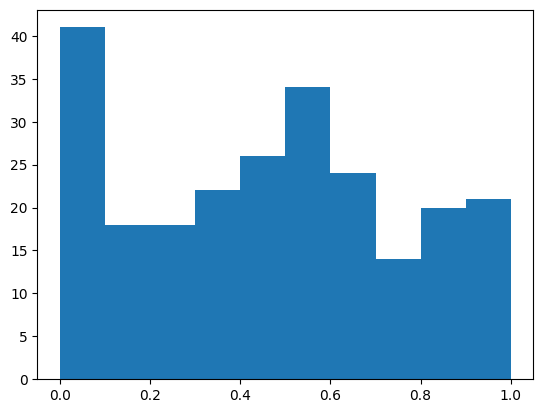

In [15]:
#get scores from human evaluations
#1 = accurate
#.5 = minor inaccurate
#0 = major inaccurate
annotations = dataset["evaluation"]["annotation"]
human_evals = []
for i in range(len(annotations)):
    total = 0
    for j in range(len(annotations[i])):
        annotation = annotations[i][j]
        if annotation == "major_inaccurate":
            total += 0
        elif annotation == "minor_inaccurate":
            total += .5
        elif annotation == "accurate":
            total += 1
        else:
            print("uh oh")
    total /= len(annotations[i])
    human_evals.append(total)
plt.hist(human_evals)
human_evals

In [30]:
#gpt = pd.read_csv("gpt3.5_scores.csv")
#metrics["GPT 3.5"] = gpt["GPT3.5_turbo"]
#actually that didn't work; made my own gpt scores and don't have time to save an import them. Here they are
gpt = ['2', '2', '7', '3', '6', '6', '2', '8', '6', '7', '7', '8', '3', '8', '7', '7', '2', '9', '7', '8', '7', '2', '7', '6', '3', '1', '8', '7', '8', '7', '2', '2', '7', '1', '7', '2', '6', '6', '6', '7', '8', '7', '7', '2', '6', '2', '8', '9', '8', '7', '7', '2', '9', '8', '7', '1', '2', '7', '2', '7', '6', '8', '9', '6', '5', '6', '2', '3', '7', '8', '7', '8', '8', '5', '9', '1', '1', '7', '8', '3', '7', '5', '6', '8', '7', '2', '7', '3', '7', '3', '7', '7', '8', '8', '8', '2', '3', '8', '7', '8', '8', '2', '9', '8', '8', '7', '6', '8', '8', '9', '6', '2', '6', '1', '2', '8', '5', '8', '6', '6', '7', '5', '3', '3', '2', '7', '8', '6', '7', '1', '5', '8', '6', '3', '8', '9', '8', '6', '8', '8', '8', '5', '9', '5', '7', '7', '8', '6', '6', '6', '6', '8', '3', '7', '1', '6', '5', '6', '8', '6', '6', '2', '8', '6', '7', '2', '9', '1', '2', '9', '8', '6', '3', '8', '8', '8', '8', '8', '7', '8', '2', '6', '9', '2', '2', '5', '6', '6', '8', '7', '7', '5', '5', '7', '7', '1', '5', '8', '8', '6', '8', '9', '6', '8', '1', '9', '6', '3', '2', '2', '2', '8', '8', '8', '8', '6', '8', '6', '1', '8', '9', '8', '7', '6', '8', '7', '8', '5', '7', '2', '6', '2', '7', '2', '8', '5', '2', '6']
gpt4 = [1.0, 1.0, 4.0, 1.0, 4.5, 4.0, 1.0, 7.5,
 5.5, 5.5, 6.5, 7.5, 1.0, 7.5, 5.5, 4.5,
 1.0, 10.0, 5.5, 8.5, 4.0, 1.0, 7.5, 5.5,
 1.0, 1.0, 8.5, 5.5, 8.5, 5.5, 1.0, 1.0,
 4.5, 1.0, 4.5, 1.0, 3.0, 4.0, 4.5, 6.5,
 9.5, 4.0, 6.5, 1.0, 4.0, 1.0, 7.5, 10.0,
 9.5, 4.5, 3.0, 1.0, 9.5, 7.5, 7.5, 1.0,
 1.0, 4.0, 1.0, 4.0, 5.5, 6.5, 7.5, 3.0,
 1.0, 6.5, 1.0, 1.0, 4.0, 7.5, 4.0, 7.5,
 9.5, 1.0, 10.0, 1.0, 1.0, 9.5, 5.5, 1.0,
 8.5, 5.5, 4.0, 7.5, 4.0, 1.0, 5.5, 4.0,
 7.5, 1.0, 4.5, 3.0, 6.5, 3.0, 8.5, 2.0,
 3.0, 5.5, 5.5, 6.5, 5.0, 1.0, 9.5, 8.5,
 8.5, 5.5, 3.0, 7.5, 9.5, 9.5, 2.0, 1.0,
 8.5, 1.0, 1.0, 7.5, 1.0, 7.5, 3.0, 6.5,
 8.5, 3.0, 2.0, 2.0, 1.0, 4.0, 9.5, 6.5,
 3.0, 1.0, 1.0, 7.5, 1.0, 1.0, 7.5, 10.0,
 6.5, 4.0, 9.5, 7.5, 7.5, 1.0, 7.5, 2.0,
 4.0, 5.0, 9.5, 2.0, 4.5, 1.0, 1.0, 7.5,
 1.0, 5.5, 1.0, 3.0, 3.0, 1.0, 8.5, 4.0,
 5.5, 1.0, 4.0, 3.0, 4.0, 1.0, 9.5, 1.0,
 1.0, 10.0, 8.5, 3.0, 2.0, 6.5, 6.5, 7.5,
 9.5, 7.5, 5.5, 6.5, 1.0, 6.5, 8.5, 1.0,
 1.0, 1.0, 4.0, 3.0, 7.5, 4.5, 6.5, 1.0,
 3.0, 6.5, 5.5, 1.0, 3.0, 7.5, 8.5, 2.0,
 8.5, 9.5, 2.0, 8.5, 1.0, 7.5, 4.0, 1.0,
 1.0, 1.0, 1.0, 7.5, 5.5, 7.5, 7.5, 4.0,
 8.5, 1.0, 1.0, 8.5, 10.0, 8.5, 6.5,2.0,10.0,7.5,8.5,5.5,5.5,1.0,2.0,1.0,8.5,1.0,8.5,1.0,1.0,2.0]
for i in range(len(gpt)):
    gpt[i] = int(gpt[i])
metrics["GPT 3.5"] = gpt
metrics["GPT 4"] = gpt4
gpt = np.array(gpt)
print(np.corrcoef(gpt4, human_evals))

[[1.         0.89145147]
 [0.89145147 1.        ]]


In [16]:
for i in range(10):
    test = np.random.rand((238))
    print(np.corrcoef(test,human_evals))

[[1.         0.01635965]
 [0.01635965 1.        ]]
[[1.         0.06881725]
 [0.06881725 1.        ]]
[[1.         0.09140763]
 [0.09140763 1.        ]]
[[ 1.         -0.02257386]
 [-0.02257386  1.        ]]
[[1.         0.01343902]
 [0.01343902 1.        ]]
[[ 1.         -0.00255053]
 [-0.00255053  1.        ]]
[[1.         0.00855561]
 [0.00855561 1.        ]]
[[ 1.         -0.01394458]
 [-0.01394458  1.        ]]
[[1.         0.04917819]
 [0.04917819 1.        ]]
[[1.         0.01302477]
 [0.01302477 1.        ]]


In [27]:
metrics.head()

,Unnamed: 0,fact,qags,rouge1,rouge2,rougeL,Smart1,Smart2,SmartL,zs,conv,SelfCheckGPT,GPT 3.5,ensemble
0,0,0.000000,0.166667,0.028230,0.002957,0.023887,23.487301,19.520974,21.659856,-0.552719,0.249117,-0.997416,2,-0.539762
1,1,0.000000,0.086364,0.076768,0.037422,0.076768,27.403541,21.547516,25.439216,-0.440639,0.209684,-0.999649,2,-0.458648
2,2,0.466667,0.177273,0.069989,0.011879,0.054083,28.421128,23.261924,26.618658,-0.551670,0.223239,-0.994874,7,-0.167126
3,3,0.500000,0.126374,0.052270,0.016925,0.049519,22.325116,18.856218,20.916260,-0.709837,0.215711,-0.991288,3,-0.423363
4,4,0.125000,0.135820,0.068259,0.015310,0.061433,31.216528,25.786420,29.685319,-0.777010,0.218822,-0.947394,6,-0.290137


Index(['Unnamed: 0', 'fact', 'qags', 'rouge1', 'rouge2', 'rougeL', 'Smart1',
       'Smart2', 'SmartL', 'zs', 'conv', 'SelfCheckGPT', 'GPT 3.5', 'ensemble',
       'GPT 4'],
      dtype='object')
[[1.         0.49653082 0.75325777 0.65951421 0.63648174 0.66531376
  0.63773947 0.61001451 0.61625234 0.67139122 0.49744722 0.59626534
  0.84542973 0.90941298 0.89145147]
 [0.49653082 1.         0.6029508  0.45243375 0.50333634 0.47488393
  0.54014828 0.52434362 0.53208434 0.49045288 0.42801658 0.45537564
  0.44094608 0.56311285 0.49800903]
 [0.75325777 0.6029508  1.         0.67111732 0.76809377 0.700859
  0.75753829 0.74091945 0.7475519  0.68589367 0.66696034 0.61360847
  0.65698866 0.87662151 0.74336125]
 [0.65951421 0.45243375 0.67111732 1.         0.90181418 0.98756302
  0.71675128 0.67657959 0.72398796 0.65082901 0.56711616 0.6344332
  0.65685105 0.73175672 0.67571528]
 [0.63648174 0.50333634 0.76809377 0.90181418 1.         0.9356457
  0.8567584  0.83226471 0.86700901 0.68443343 0.7588

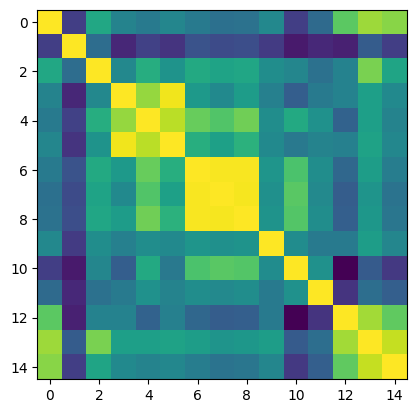

In [34]:

mlist = metrics.keys()
N = len(mlist)
inter_metric = np.empty((N,N))
print(mlist)
for i in range(len(mlist)):
    for j in range(len(mlist)):
        if i != 0 and j != 0:
            inter_metric[i][j] = np.corrcoef(metrics[mlist[i]],metrics[mlist[j]])[0][1]
        elif i == 0:
            if j!= 0:
                inter_metric[i][j] = np.corrcoef(human_evals,metrics[mlist[j]])[0][1]
            else:
                inter_metric[0][0] = 1.
        elif j == 0:
            inter_metric[i][j] = np.corrcoef(metrics[mlist[i]], human_evals)[0][1]
print(inter_metric)
plt.imshow(inter_metric)
for i in range(len(inter_metric)):
    print(mlist[i], sum(inter_metric[i][1:-1]*np.array([1,1,1/6,1/6,1/6,1/6,1/6,1/6,1/2,1/2,1,1,1])))

In [24]:
def make_ensemble(df, weights = np.array([1,1,1/3,1/3,1/3,1/3,1/3,1/3,1,1,1,1])):
    ensemble = np.zeros(238)
    length = len(df.keys())-1
    #first normalize each to have sum = 0, stddev = 1
    df = (df-df.mean())/df.std()
    #then sum ensemble using weights function
    for i in range(len(df.keys())):
        if (df.keys()[i] != 'Unnamed: 0') and (df.keys()[i] != "ensemble"):
            for j in range(len(df[df.keys()[i]])):
                ensemble[j] += df[df.keys()[i]][j]*weights[i-1]
    ensemble /= length
    return ensemble

In [33]:
metrics["ensemble"] = make_ensemble(metrics, weights = np.array([0,1,0,0,0,0,0,0,0,0,0,1,1,1]))
metrics

,Unnamed: 0,fact,qags,rouge1,rouge2,rougeL,Smart1,Smart2,SmartL,zs,conv,SelfCheckGPT,GPT 3.5,ensemble,GPT 4
0,0,0.000000,0.166667,0.028230,0.002957,0.023887,23.487301,19.520974,21.659856,-0.552719,0.249117,-0.997416,2,-0.237155,1.0
1,1,0.000000,0.086364,0.076768,0.037422,0.076768,27.403541,21.547516,25.439216,-0.440639,0.209684,-0.999649,2,-0.266310,1.0
2,2,0.466667,0.177273,0.069989,0.011879,0.054083,28.421128,23.261924,26.618658,-0.551670,0.223239,-0.994874,7,-0.015129,4.0
3,3,0.500000,0.126374,0.052270,0.016925,0.049519,22.325116,18.856218,20.916260,-0.709837,0.215711,-0.991288,3,-0.222288,1.0
4,4,0.125000,0.135820,0.068259,0.015310,0.061433,31.216528,25.786420,29.685319,-0.777010,0.218822,-0.947394,6,-0.047892,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,0.142857,0.092000,0.026316,0.000000,0.025063,23.134009,19.652512,21.781214,-0.904063,0.231275,-0.999578,2,-0.264264,1.0
234,234,1.000000,0.250000,0.092397,0.017769,0.082772,34.317811,27.984448,32.105148,-0.052294,0.234655,-0.998177,8,0.146816,8.5
235,235,0.000000,0.055556,0.055380,0.016129,0.052215,27.255774,23.030052,26.597500,-0.553773,0.217451,-0.997370,5,-0.189008,1.0
236,236,0.000000,0.181818,0.007572,0.000968,0.007572,23.169782,19.601486,20.832232,-0.508882,0.230450,-0.999379,2,-0.231654,1.0
